### EVALUATION OF MALARIA INCIDENCE IN BURUNDI AND SENEGAL FROM 2017 TO 2020

**Steps:**
  - Import packages pandas, numpy, matplotlib, seaborn
  - Load firstly burundi dataset
  -check variables types
  - create a dictionnarie to rename variables to make the name more understandable
  - tidy the dataset  with pd.melt function to have every variable with its own value and make them ready for analysis
  - checking missing values
  - fill missing values by the mean value
  - Apply the same process to Senegal dataset
  - Do analysis to see the trends of malaria incidence in both countries by replying to the questions below 
  - Compare the trends                                                                                            
                                                                                                         
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. Data preprocessing
>>a - BURUNDI

In [2]:
df_burundi=pd.read_csv('rep_burundi.csv')
df_burundi.head()

,asdf_id,map_pf_incidence_rate.2020.mean,map_pf_incidence_rate.2019.mean,map_pf_incidence_rate.2018.mean,map_pf_incidence_rate.2017.mean,gpm_precipitation_v07b_yearly_mean.2020.mean,gpm_precipitation_v07b_yearly_mean.2019.mean,gpm_precipitation_v07b_yearly_mean.2018.mean,gpm_precipitation_v07b_yearly_mean.2017.mean,cru_ts_407_tmp_yearly_mean.2020.mean,cru_ts_407_tmp_yearly_mean.2019.mean,cru_ts_407_tmp_yearly_mean.2018.mean,cru_ts_407_tmp_yearly_mean.2017.mean,Level,gqid,id,shapeGroup,shapeID,shapeName,shapeType
0,0,0.336435,0.305433,0.275638,0.233000,124.753915,129.033419,126.351774,123.971844,17.850000,18.075000,17.841667,18.358333,ADM2,0,0,BDI,BDI-ADM2-21766830B92335244,Ryansoro,ADM2
1,1,0.343204,0.312835,0.287161,0.234132,116.933945,131.494313,133.247274,112.164828,18.858334,19.050000,18.833334,19.325000,ADM2,1,1,BDI,BDI-ADM2-21766830B39191112,Ndava,ADM2
2,2,0.245776,0.214867,0.195301,0.146348,131.633417,140.943462,135.727514,133.159270,18.839584,19.052084,18.831251,19.358334,ADM2,2,2,BDI,BDI-ADM2-21766830B5235388,Buyengero,ADM2
3,3,0.196056,0.173976,0.174688,0.147564,135.943436,139.234229,141.248330,121.879354,21.808334,21.983333,21.800001,22.358334,ADM2,3,3,BDI,BDI-ADM2-21766830B26185073,Bugarama,ADM2
4,4,0.251924,0.221336,0.212273,0.169381,137.631911,141.681206,138.465167,134.759273,21.668085,21.862833,21.657284,22.211296,ADM2,4,4,BDI,BDI-ADM2-21766830B85878109,Rumonge,ADM2


In [3]:
df_burundi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   asdf_id                                       119 non-null    int64  
 1   map_pf_incidence_rate.2020.mean               117 non-null    float64
 2   map_pf_incidence_rate.2019.mean               117 non-null    float64
 3   map_pf_incidence_rate.2018.mean               117 non-null    float64
 4   map_pf_incidence_rate.2017.mean               117 non-null    float64
 5   gpm_precipitation_v07b_yearly_mean.2020.mean  119 non-null    float64
 6   gpm_precipitation_v07b_yearly_mean.2019.mean  119 non-null    float64
 7   gpm_precipitation_v07b_yearly_mean.2018.mean  119 non-null    float64
 8   gpm_precipitation_v07b_yearly_mean.2017.mean  119 non-null    float64
 9   cru_ts_407_tmp_yearly_mean.2020.mean          119 non-null    flo

In [4]:
df_burundi.rename(columns={
    'map_pf_incidence_rate.2020.mean': 'incidence_2020',
    'map_pf_incidence_rate.2019.mean': 'incidence_2019',
    'map_pf_incidence_rate.2018.mean': 'incidence_2018',
    'map_pf_incidence_rate.2017.mean': 'incidence_2017',
    'gpm_precipitation_v07b_yearly_mean.2020.mean': 'precipitation_2020',
    'gpm_precipitation_v07b_yearly_mean.2019.mean': 'precipitation_2019',
    'gpm_precipitation_v07b_yearly_mean.2018.mean': 'precipitation_2018',
    'gpm_precipitation_v07b_yearly_mean.2017.mean': 'precipitation_2017',
    'cru_ts_407_tmp_yearly_mean.2020.mean': 'temperature_2020',
    'cru_ts_407_tmp_yearly_mean.2019.mean': 'temperature_2019',
    'cru_ts_407_tmp_yearly_mean.2018.mean': 'temperature_2018',
    'cru_ts_407_tmp_yearly_mean.2017.mean': 'temperature_2017'
}, inplace=True)

In [5]:
df_tidy_Burundi = pd.melt(df_burundi, 
                  id_vars=['asdf_id', 'Level', 'id', 'shapeName', 'shapeType'], 
                  value_vars=['incidence_2020', 'incidence_2019', 'incidence_2018', 'incidence_2017',
                              'precipitation_2020', 'precipitation_2019', 'precipitation_2018', 'precipitation_2017',
                              'temperature_2020', 'temperature_2019', 'temperature_2018', 'temperature_2017'],
                  var_name='variable', 
                  value_name='value')

In [6]:
df_tidy_Burundi[['type', 'year']] = df_tidy_Burundi['variable'].str.split('_', expand=True)
df_tidy_Burundi.drop(columns='variable', inplace=True)

df_tidy_Burundi = df_tidy_Burundi.pivot_table(index=['asdf_id', 'Level', 'id', 'shapeName', 'shapeType', 'year'], 
                              columns='type', values='value').reset_index()

print(df_tidy_Burundi.head())

type  asdf_id Level  id shapeName shapeType  year  incidence  precipitation  \
0           0  ADM2   0  Ryansoro      ADM2  2017   0.233000     123.971844   
1           0  ADM2   0  Ryansoro      ADM2  2018   0.275638     126.351774   
2           0  ADM2   0  Ryansoro      ADM2  2019   0.305433     129.033419   
3           0  ADM2   0  Ryansoro      ADM2  2020   0.336435     124.753915   
4           1  ADM2   1     Ndava      ADM2  2017   0.234132     112.164828   

type  temperature  
0       18.358333  
1       17.841667  
2       18.075000  
3       17.850000  
4       19.325000  


In [7]:
df_tidy_Burundi['year']= pd.to_datetime(df_tidy_Burundi['year']).dt.year
df_tidy_Burundi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asdf_id        476 non-null    int64  
 1   Level          476 non-null    object 
 2   id             476 non-null    int64  
 3   shapeName      476 non-null    object 
 4   shapeType      476 non-null    object 
 5   year           476 non-null    int32  
 6   incidence      468 non-null    float64
 7   precipitation  476 non-null    float64
 8   temperature    476 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 31.7+ KB


In [8]:
df_tidy_Burundi['incidence'].fillna(df_tidy_Burundi['incidence'].mean(), inplace=True)
df_tidy_Burundi['precipitation'].fillna(df_tidy_Burundi['precipitation'].mean(), inplace=True)
df_tidy_Burundi['temperature'].fillna(df_tidy_Burundi['temperature'].mean(), inplace=True)
print("Missing values after filling :\n", df_tidy_Burundi.isnull().sum())


Missing values after filling :
 type
asdf_id          0
Level            0
id               0
shapeName        0
shapeType        0
year             0
incidence        0
precipitation    0
temperature      0
dtype: int64


C:\Users\HP-PC\AppData\Local\Temp\ipykernel_9884\3659591038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tidy_Burundi['incidence'].fillna(df_tidy_Burundi['incidence'].mean(), inplace=True)
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_9884\3659591038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [9]:
missing_values = df_tidy_Burundi.isnull().sum()
print("Missing values per column :\n", missing_values)


Missing values per column :
 type
asdf_id          0
Level            0
id               0
shapeName        0
shapeType        0
year             0
incidence        0
precipitation    0
temperature      0
dtype: int64


### 1. Data preprocessing 
>>b-SENEGAL

In [10]:
df_Senegal= pd.read_csv('rep_senegal.csv')
df_Senegal.head()

,asdf_id,map_pf_incidence_rate.2020.mean,map_pf_incidence_rate.2019.mean,map_pf_incidence_rate.2018.mean,map_pf_incidence_rate.2017.mean,gpm_precipitation_v07b_yearly_mean.2020.mean,gpm_precipitation_v07b_yearly_mean.2019.mean,gpm_precipitation_v07b_yearly_mean.2018.mean,gpm_precipitation_v07b_yearly_mean.2017.mean,cru_ts_407_tmp_yearly_mean.2020.mean,cru_ts_407_tmp_yearly_mean.2019.mean,cru_ts_407_tmp_yearly_mean.2018.mean,cru_ts_407_tmp_yearly_mean.2017.mean,Level,gqid,shapeGroup,shapeID,shapeName,shapeType
0,0,0.098829,0.067738,0.093338,0.081123,95.786662,87.165918,88.567898,83.752162,30.420853,29.866715,30.040348,30.349379,ADM2,0,SEN,SEN-ADM2-92650715B27276283,Bakel,ADM2
1,1,0.113682,0.074689,0.093124,0.067987,77.707079,50.000821,48.499451,59.005639,28.537214,27.660887,27.496605,28.234432,ADM2,1,SEN,SEN-ADM2-92650715B64906891,Bambey,ADM2
2,2,0.109566,0.088932,0.124888,0.097477,182.020487,106.316868,110.205928,128.314555,28.141624,27.303680,27.199948,27.879606,ADM2,2,SEN,SEN-ADM2-92650715B3747200,Bignona,ADM2
3,3,0.111767,0.078604,0.101288,0.071257,103.320686,73.776296,68.263856,76.659890,29.745238,28.893410,28.801330,29.477309,ADM2,3,SEN,SEN-ADM2-92650715B79504758,Birkelane,ADM2
4,4,0.108232,0.074622,0.097093,0.071378,142.601032,97.166771,93.065882,111.053057,28.935881,28.109251,28.059773,28.700526,ADM2,4,SEN,SEN-ADM2-92650715B2973786,Bounkiling,ADM2


In [11]:
df_Senegal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   asdf_id                                       45 non-null     int64  
 1   map_pf_incidence_rate.2020.mean               45 non-null     float64
 2   map_pf_incidence_rate.2019.mean               45 non-null     float64
 3   map_pf_incidence_rate.2018.mean               45 non-null     float64
 4   map_pf_incidence_rate.2017.mean               45 non-null     float64
 5   gpm_precipitation_v07b_yearly_mean.2020.mean  45 non-null     float64
 6   gpm_precipitation_v07b_yearly_mean.2019.mean  45 non-null     float64
 7   gpm_precipitation_v07b_yearly_mean.2018.mean  45 non-null     float64
 8   gpm_precipitation_v07b_yearly_mean.2017.mean  45 non-null     float64
 9   cru_ts_407_tmp_yearly_mean.2020.mean          45 non-null     float

In [12]:
df_Senegal.rename(columns={
   'map_pf_incidence_rate.2020.mean': 'incidence_2020',
    'map_pf_incidence_rate.2019.mean': 'incidence_2019',
    'map_pf_incidence_rate.2018.mean': 'incidence_2018',
    'map_pf_incidence_rate.2017.mean': 'incidence_2017',
    'gpm_precipitation_v07b_yearly_mean.2020.mean': 'precipitation_2020',
    'gpm_precipitation_v07b_yearly_mean.2019.mean': 'precipitation_2019',
    'gpm_precipitation_v07b_yearly_mean.2018.mean': 'precipitation_2018',
    'gpm_precipitation_v07b_yearly_mean.2017.mean': 'precipitation_2017',
    'cru_ts_407_tmp_yearly_mean.2020.mean': 'temperature_2020',
    'cru_ts_407_tmp_yearly_mean.2019.mean': 'temperature_2019',
    'cru_ts_407_tmp_yearly_mean.2018.mean': 'temperature_2018',
    'cru_ts_407_tmp_yearly_mean.2017.mean': 'temperature_2017'
}, inplace=True)

In [13]:
df_tidy_Sen= pd.melt(df_Senegal, 
                  id_vars=['asdf_id', 'Level', 'shapeName', 'shapeType'],
                  value_vars=['incidence_2020', 'incidence_2019', 'incidence_2018', 'incidence_2017',
                              'precipitation_2020', 'precipitation_2019', 'precipitation_2018', 'precipitation_2017',
                              'temperature_2020', 'temperature_2019', 'temperature_2018', 'temperature_2017'],
                  var_name='variable', 
                  value_name='value')

In [14]:
df_tidy_Sen[['type', 'year']] = df_tidy_Sen['variable'].str.split('_', expand=True)
df_tidy_Sen.drop(columns='variable', inplace=True)

df_tidy_Sen = df_tidy_Sen.pivot_table(index=['asdf_id', 'Level', 'shapeName', 'shapeType', 'year'], 
                              columns='type', values='value').reset_index()

print(df_tidy_Sen.head())

type  asdf_id Level shapeName shapeType  year  incidence  precipitation  \
0           0  ADM2     Bakel      ADM2  2017   0.081123      83.752162   
1           0  ADM2     Bakel      ADM2  2018   0.093338      88.567898   
2           0  ADM2     Bakel      ADM2  2019   0.067738      87.165918   
3           0  ADM2     Bakel      ADM2  2020   0.098829      95.786662   
4           1  ADM2    Bambey      ADM2  2017   0.067987      59.005639   

type  temperature  
0       30.349379  
1       30.040348  
2       29.866715  
3       30.420853  
4       28.234432  


In [15]:
df_tidy_Sen['year']= pd.to_datetime(df_tidy_Sen['year']).dt.year
df_tidy_Sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asdf_id        180 non-null    int64  
 1   Level          180 non-null    object 
 2   shapeName      180 non-null    object 
 3   shapeType      180 non-null    object 
 4   year           180 non-null    int32  
 5   incidence      180 non-null    float64
 6   precipitation  180 non-null    float64
 7   temperature    180 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 10.7+ KB


In [16]:
df_tidy_Sen['incidence'].fillna(df_tidy_Sen['incidence'].mean(), inplace=True)
df_tidy_Sen['precipitation'].fillna(df_tidy_Sen['precipitation'].mean(), inplace=True)
df_tidy_Sen['temperature'].fillna(df_tidy_Sen['temperature'].mean(), inplace=True)
print("Missing values after filling :\n", df_tidy_Sen.isnull().sum())

Missing values after filling :
 type
asdf_id          0
Level            0
shapeName        0
shapeType        0
year             0
incidence        0
precipitation    0
temperature      0
dtype: int64


C:\Users\HP-PC\AppData\Local\Temp\ipykernel_9884\4108769268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tidy_Sen['incidence'].fillna(df_tidy_Sen['incidence'].mean(), inplace=True)
C:\Users\HP-PC\AppData\Local\Temp\ipykernel_9884\4108769268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [17]:
missing_values = df_tidy_Sen.isnull().sum()
print("Missing values per column :\n", missing_values)


Missing values per column :
 type
asdf_id          0
Level            0
shapeName        0
shapeType        0
year             0
incidence        0
precipitation    0
temperature      0
dtype: int64


## 2. Data Analysis
>>a- Burundi

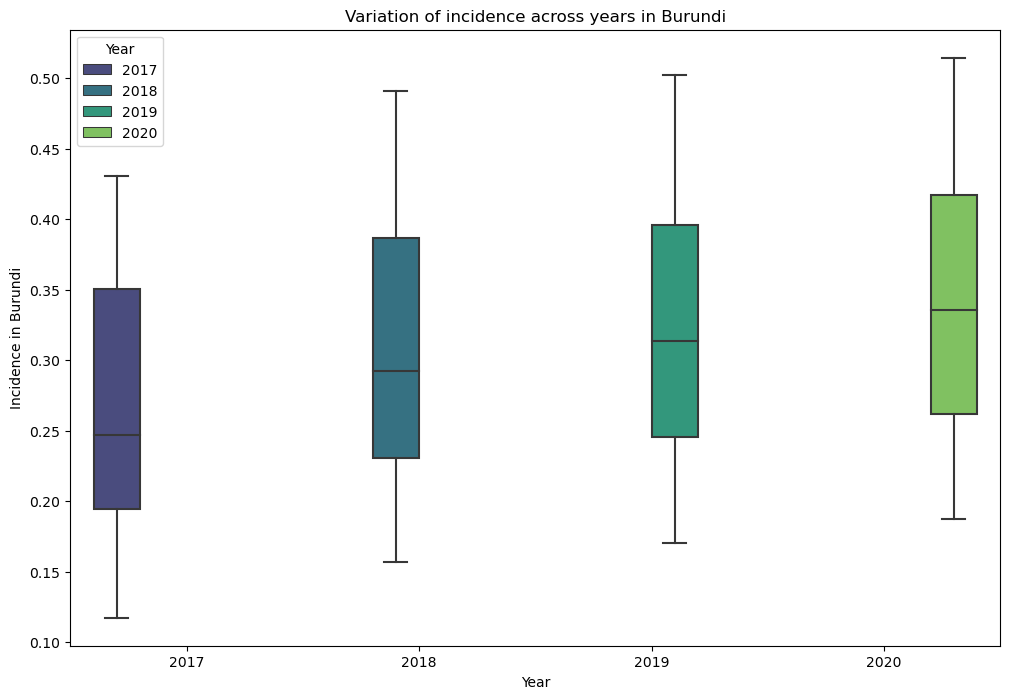

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_tidy_Burundi, x= 'year',y = 'incidence', hue = 'year', palette = 'viridis')
plt.xlabel('Year')
plt.ylabel('Incidence in Burundi')
plt.title('Variation of incidence across years in Burundi')
plt.legend(title='Year')
plt.show()
plt.savefig('Variation of incidence across years in Burundi')

This boxplot shows the distribution of incidence across years, 
From this plot one can notice that the median of malaria incidence go up as the years are passing
So from 2017 to 2020 the incidence of malaria increase

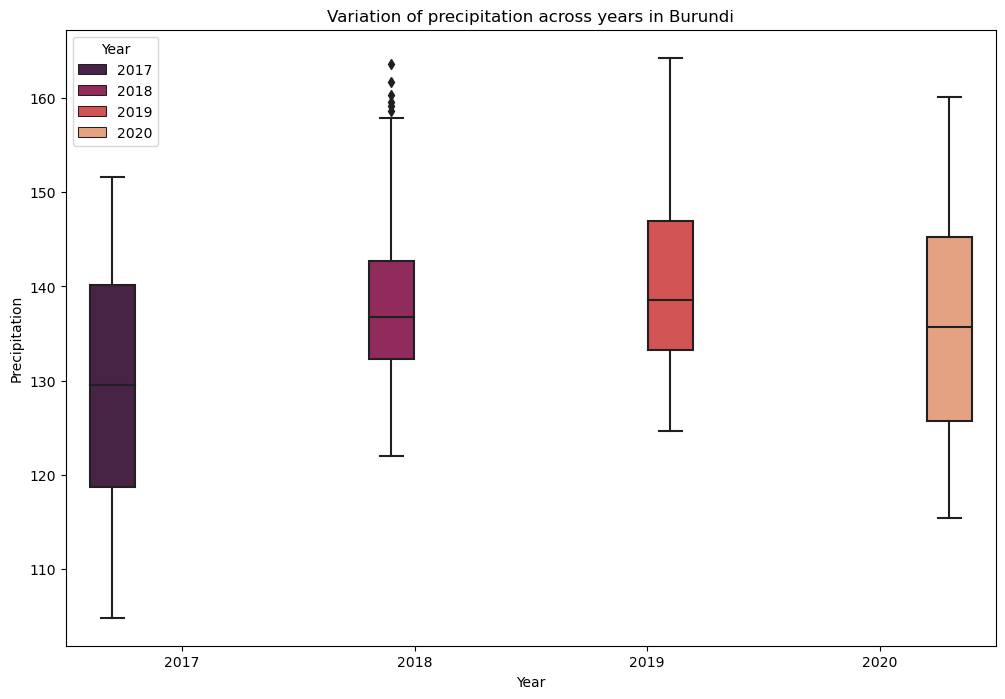

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_tidy_Burundi, x= 'year',y = 'precipitation', hue = 'year', palette = 'rocket')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Variation of precipitation across years in Burundi')
plt.legend(title='Year')
plt.show()
plt.savefig('Variation of precipitation across years Burundi')

This boxplot show the variation of precipitations across the years
From this boxplot one can see that the mediane of precipitation is increasing as years are passing.
In 2018 , we can see that we have some values that are out of the range of the remmain data points(outliers).
It means that in 2018 the precipitation increase too much.So the higher the precipitation is the higher the malaria incidence will be in Burundi.

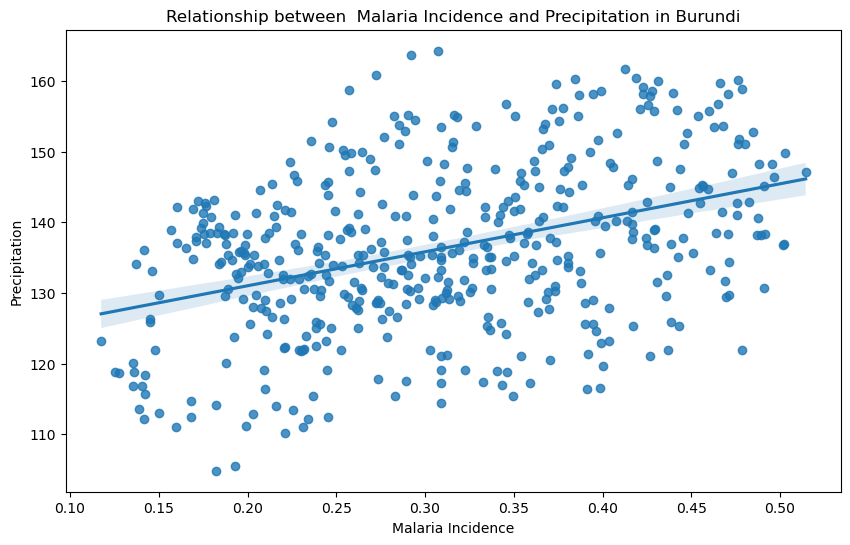

In [20]:
#Let's check the  linear relationship between the malaria incidence and the precipitation in Burundi
plt.figure(figsize=(10, 6))  
sns.regplot(data=df_tidy_Burundi, x='incidence', y='precipitation', marker='o')

plt.xlabel('Malaria Incidence')
plt.ylabel('Precipitation')
plt.title('Relationship between  Malaria Incidence and Precipitation in Burundi')
plt.savefig('Relationship between  Malaria Incidence and Precipitation in Burundi')
# Display the plot
plt.show()


This scatterplot shows us there is a linear relationship between  malaria incidence and precipitation. As the precipitation increases the malaria incidence increase also. So one can advice to decisions makers to consider the precipitation among factors that can allow them to mitigate the increasing of malaria incidence rate for next years.

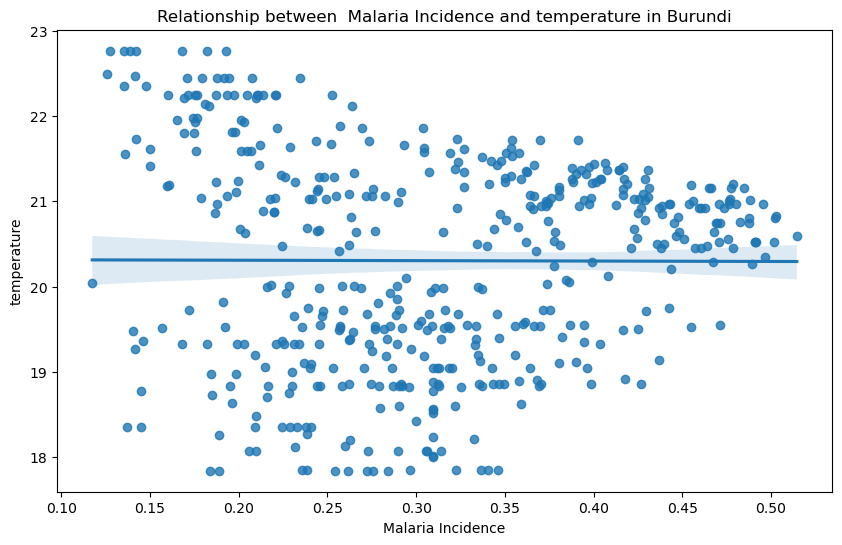

In [21]:
# Let's visualize the relationship between malaria and temperature in  Burundi
plt.figure(figsize=(10, 6)) 
sns.regplot(data=df_tidy_Burundi, x='incidence', y='temperature', marker='o')
plt.xlabel('Malaria Incidence')
plt.ylabel('temperature')
plt.title('Relationship between  Malaria Incidence and temperature in Burundi')
plt.savefig('Relationship between  Malaria Incidence and  temperature in Burundi')
plt.show()

This scatterplot shows the relationship between precipitation and malaria incidence in Burundi.
From this plot , one can notice that there is a weak linear relationship between Malaria incidence.It means that we cannot use temperature as parameters to evaluate the malaria incidence rate in Burundi.

In [22]:
#Computation of correlation coefficient to appreciate the strength of relationship between the incudence and precipitation

corr_precipitation_incidence = df_tidy_Burundi['incidence'].corr(df_tidy_Burundi['precipitation'])
print(f'Pearson correlation coefficient between incidence and precipitation: {corr_precipitation_incidence:}')

#Computation of correlation coefficient to appreciate the strength of relationship between the incudence and temperature

corr_temperature_incidence = df_tidy_Burundi['incidence'].corr(df_tidy_Burundi['temperature'])
print(f'Pearson correlation coefficient between incidence and temperature: {corr_temperature_incidence:}')

Pearson correlation coefficient between incidence and precipitation: 0.3963386112682734
Pearson correlation coefficient between incidence and temperature: -0.003697157687506688


There is positive relationshionship between precipitation and  malaria incidence in Burundi

In [23]:

temp_by_region = df_tidy_Burundi.groupby('shapeName')['temperature'].mean().sort_values()

print("Average temperature per region :\n", temp_by_region)

Average temperature per region :
 shapeName
Bisoro        18.031250
Matana        18.031250
Songa         18.031250
Gishubi       18.031250
Nyanrusang    18.031250
                ...    
Kanyosha1     22.427084
Gihanga       22.427084
Mpanda        22.427084
Muha          22.427084
Ntahangwa     22.427084
Name: temperature, Length: 118, dtype: float64


One can notice that in Burundi there are some regions that  have  the same temperature.

In [24]:
# High Temperatures and incidence rate associated
high_temp_incidence = df_tidy_Burundi[df_tidy_Burundi['temperature'] == df_tidy_Burundi['temperature'].max()]
print("Regions with high temperatures and their  taux incidence rate:\n", high_temp_incidence[['shapeName', 'temperature', 'incidence']])


Regions with high temperatures and their  taux incidence rate:
 type  shapeName  temperature  incidence
24    Kanyosha1    22.766667   0.135390
92       Mpanda    22.766667   0.182206
372     Gihanga    22.766667   0.192998
376   Mutimbuzi    22.766667   0.167898
460        Muha    22.766667   0.139018
464      Mukaza    22.766667   0.127736
468   Ntahangwa    22.766667   0.142268


The temperature is the same in different regions but the malaria incidence variate from one region to another. 
One can say the incidence of malaria depends on the regions 

In [25]:
#computation of minimun value  and maximum value of precipitation of dry_regions and wet_regions respectively
dry_regions = df_tidy_Burundi[df_tidy_Burundi['precipitation'] == df_tidy_Burundi['precipitation'].min()]
wet_regions = df_tidy_Burundi[df_tidy_Burundi['precipitation'] == df_tidy_Burundi['precipitation'].max()]

print("Dry Regions and  their incidence:\n", dry_regions[['shapeName', 'precipitation', 'incidence']])
print(" Humid Region and their incidence:\n", wet_regions[['shapeName', 'precipitation', 'incidence']])


Dry Regions and  their incidence:
 type shapeName  precipitation  incidence
92      Mpanda     104.860442   0.182206
 Humid Region and their incidence:
 type shapeName  precipitation  incidence
358     Mabayi     164.257829   0.307492


One can notice that the incidence of malaria in Humid region is higher than the one in dry dry_regions
one can also notice as the precipitation becomes higher the inccidence of malaria become higher too.

In [26]:
temperature_incidence_corr = df_tidy_Burundi['temperature'].corr(df_tidy_Burundi['precipitation'])
print("Correlation between temperature and  incidence : ", temperature_incidence_corr)

Correlation between temperature and  incidence :  0.1389642775210859


The correlation between temperature and precipitation is low

Text(0.5, 1.0, 'Average_incidence In Burundi across years')

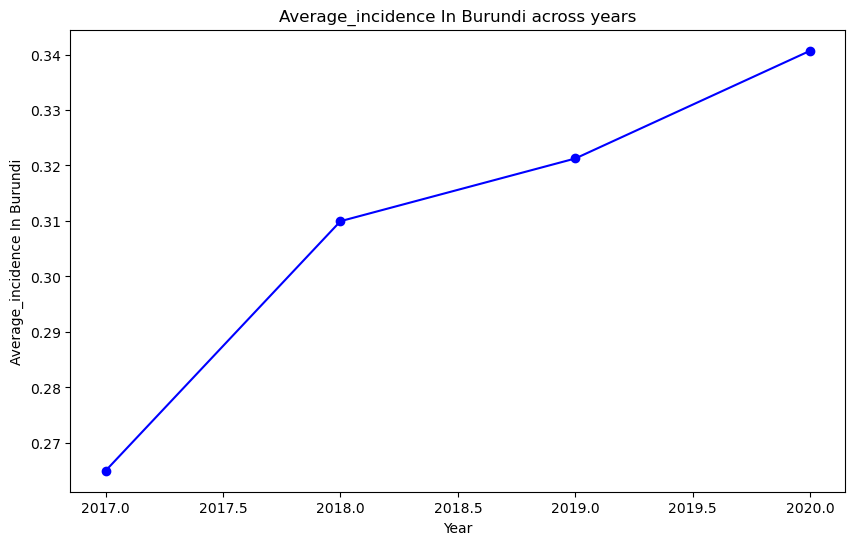

In [27]:
#Let's plot the average incidence of malaria in Burundi from 2017 to 2020
average_incidence_per_year = df_tidy_Burundi.groupby('year')['incidence'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_incidence_per_year.index, average_incidence_per_year.values, marker='o', color='b', label='Average Incidence')
plt.xlabel('Year')
plt.ylabel('Average_incidence In Burundi')
plt.title('Average_incidence In Burundi across years')

This lineplot show the variation of malaria incidence across years, from this lineplot one can notice that as years are passing the incidence of malaria increase in Burundi.


## 2. Data analysis
>> b- SENEGAL

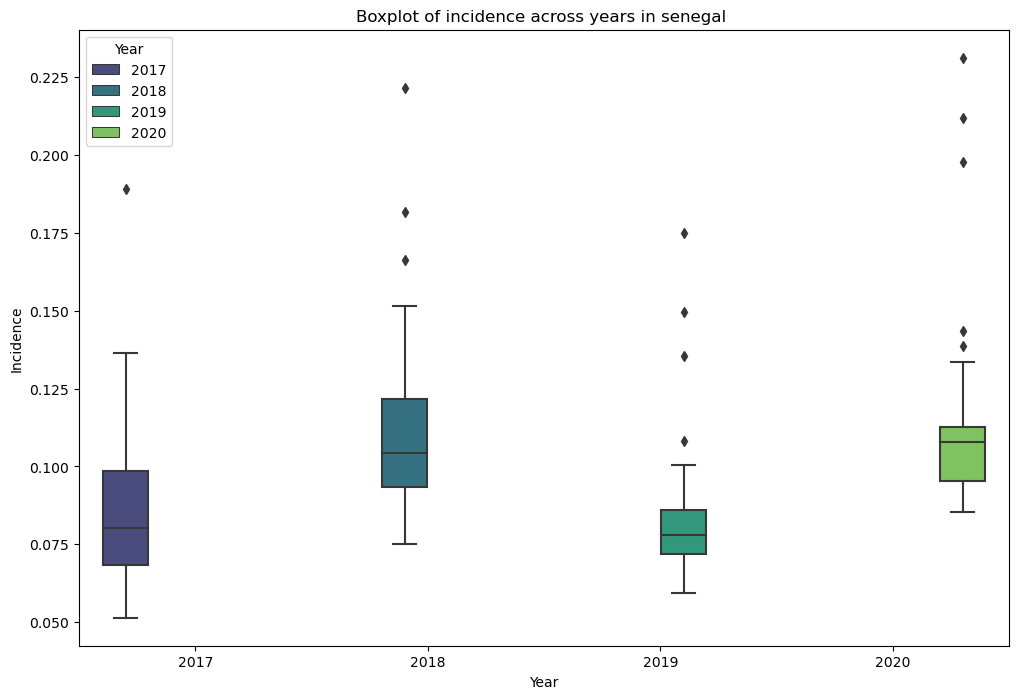

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_tidy_Sen, x= 'year',y = 'incidence', hue = 'year', palette = 'viridis')
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.title('Boxplot of incidence across years in senegal ')
plt.legend(title='Year')
plt.show()
plt.savefig('Variation of incidence across years')

This boxplot shows the distribution of malaria incidence from 2017 to 2020 in Senegal.
One can notice that the median are not the same as years are passing. In 2018 the median increase, so the malaria incidence also increase, while in 2019 it decrease with, and increase again in 2020, from 2018 to 2020 we can notice some outliers after the maximum  value of  malaria incidence. 
These outliers indicates that in these years we have some extreme values of malaria incidence.This can also be due to precipitations variations during these years.

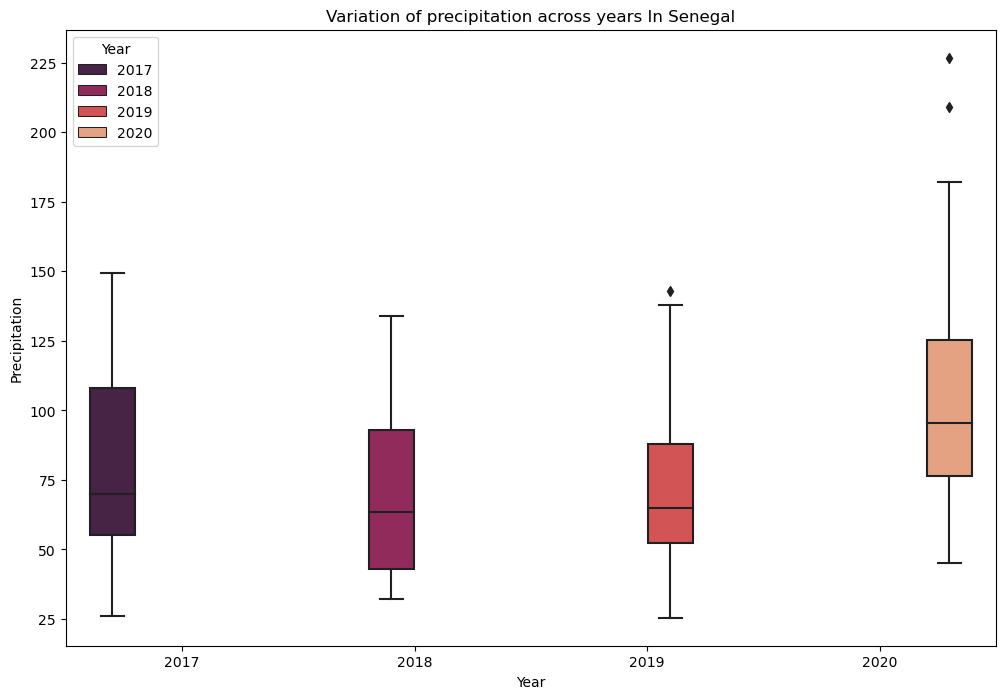

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(df_tidy_Sen, x= 'year',y = 'precipitation', hue = 'year', palette = 'rocket')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Variation of precipitation across years In Senegal')
plt.legend(title='Year')
plt.show()
plt.savefig('Variation of precipitation across years')

This boxplot shows the distribution of precipiation from 2017 to 2020.
From this boxplot, one can notice a decrease of the median of precipitation 2018 and 2019 while in 2020 it increase even more. 

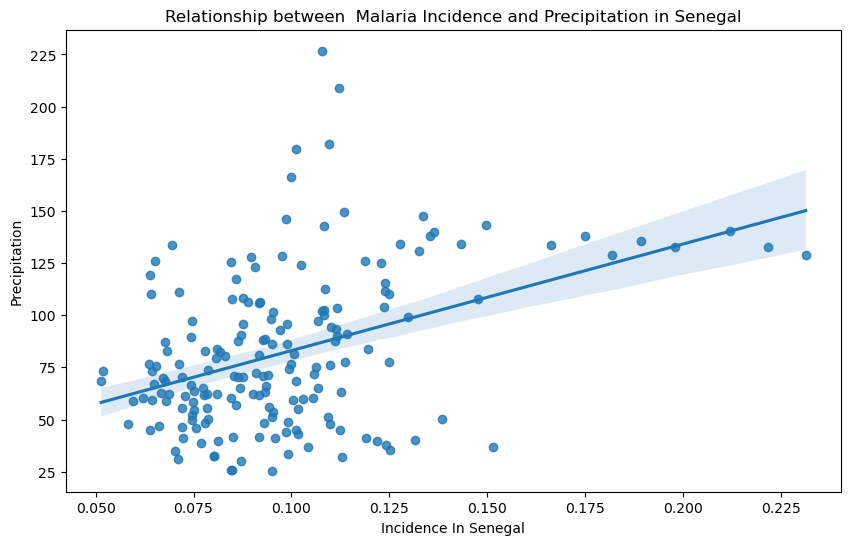

In [30]:
#. Relationship between precipitation and malaria incidence
plt.figure(figsize=(10, 6))  
sns.regplot(data=df_tidy_Sen, x='incidence', y='precipitation', marker='o')

plt.xlabel('Incidence In Senegal')
plt.ylabel('Precipitation')
plt.title('Relationship between  Malaria Incidence and Precipitation in Senegal')
plt.savefig('Relationship between  Malaria Incidence and Precipitation in Senegal')
# Display the plot
plt.show()

This scatterplot shows the relationship between the precipitation and malaria Incidence in df_Senegal.
From this scatterplot one can notice that there is positive linear relationship between precipitation and malaria incidence in Senegal. It means that as the precipitation is increasing the malaria incidence also increase. 


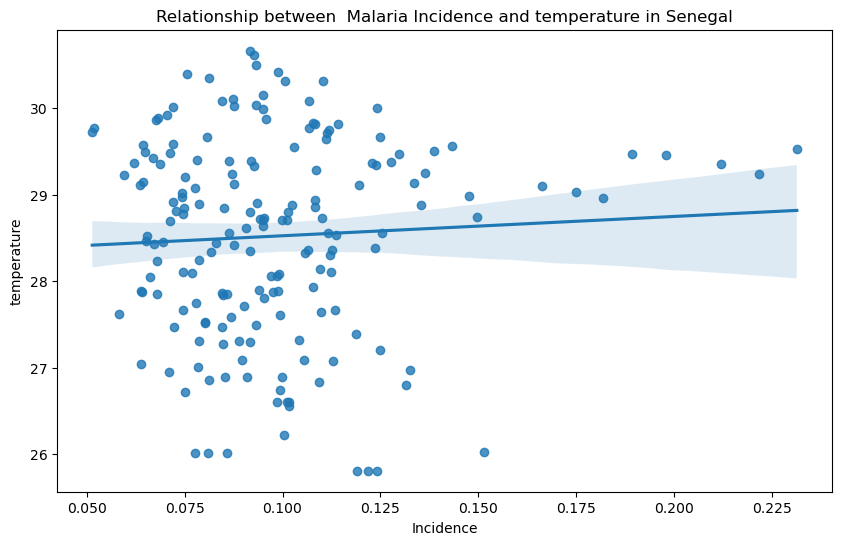

In [31]:
plt.figure(figsize=(10, 6)) 
sns.regplot(data=df_tidy_Sen, x='incidence', y='temperature', marker='o')
plt.xlabel('Incidence')
plt.ylabel('temperature')
plt.title('Relationship between  Malaria Incidence and temperature in Senegal')
plt.savefig('Relationship between  Malaria Incidence and  temperature in Senegal')
plt.show()

This scatterplot shows the relationship between the temperature and  malaria incidence  in senegal. 
From this scatterplot one can notice that there is weak linear relationship between the temperature and malaria incidence. 

In [32]:
correlation_incidence_temperature = df_tidy_Sen['incidence'].corr(df_tidy_Sen['temperature'])

print(f'Pearson correlation coefficient between incidence and temperature: {correlation_incidence_temperature:}')

Pearson correlation coefficient between incidence and temperature: 0.05818645673163138


In [33]:
corr_precipitation_incidence_sen = df_tidy_Sen['incidence'].corr(df_tidy_Sen['precipitation'])

print(f'Pearson correlation coefficient between incidence and precipitation: {corr_precipitation_incidence_sen:}')

Pearson correlation coefficient between incidence and precipitation: 0.4138124748246316


In [34]:
temp_by_region = df_tidy_Sen.groupby('shapeName')['temperature'].mean().sort_values()

print("Average temperature per region :\n", temp_by_region)


Average temperature per region :
 shapeName
Pikine               26.329167
Rufisque             26.329167
Guediawaye           26.329167
Dakar                26.532500
Thies                27.049279
Saint Louis          27.258776
Mbour                27.329849
Tivaoune             27.354713
Oussouye             27.414281
Dagana               27.580280
Bignona              27.631215
Kebemer              27.785094
Ziguinchor           27.803139
Louga                27.823144
Bambey               27.982285
Foundiougne          28.085977
Fatick               28.178808
Sedhiou              28.222005
Goudomp              28.222827
Bounkiling           28.451358
Diourbel             28.561565
Kolda                28.687241
Nioro Du Rip         28.775251
Kaolack              28.857350
Medina Yoroufoula    28.899096
Podor                29.002951
Salemata             29.079047
Mbacke               29.102124
Linguere             29.158771
Gossas               29.172978
Velingara            29.18

The average temperature variate from one region to another. some region have less or similar temperature in Senegal. 

In [35]:
# Higher Temperatures  and  higher incidence associated
temp_incidence = df_tidy_Sen[df_tidy_Sen['temperature'] == df_tidy_Sen['temperature'].max()]
print("Régions avec les températures les plus élevées et leur taux d'incidence:\n", temp_incidence[['shapeName', 'temperature', 'incidence']])


Régions avec les températures les plus élevées et leur taux d'incidence:
 type shapeName  temperature  incidence
67       Kanel    30.663343   0.091711


The kanel region has the highest temperature in Senegal based on our dataset.

In [36]:
dry_regions1 = df_tidy_Sen[df_tidy_Sen['precipitation'] == df_tidy_Sen['precipitation'].min()]
wet_regions1 = df_tidy_Sen[df_tidy_Sen['precipitation'] == df_tidy_Sen['precipitation'].max()]

print("Dry Regions and  their incidence:\n", dry_regions1[['shapeName', 'precipitation', 'incidence']])
print(" Humid Region and their incidence:\n", wet_regions1[['shapeName', 'precipitation', 'incidence']])

Dry Regions and  their incidence:
 type shapeName  precipitation  incidence
134      Podor       25.46088   0.094991
 Humid Region and their incidence:
 type shapeName  precipitation  incidence
127   Oussouye     226.807165   0.107787


The Podor region has the lowest precipitation and the lowest malaria incidence rate while Oussouye region has the higest precipitation and the highest incidence. This shows that the precipitation is a factor that decision makers have to mitigate if their want to reduce the malaria incidence in Senegal.

In [37]:
temperature_incidence_corr1 = df_tidy_Sen['temperature'].corr(df_tidy_Sen['precipitation'])
print("Correlation between temperature and  incidence : ", temperature_incidence_corr1)

Correlation between temperature and  incidence :  0.2419134761646419


The correlation coefficient  shows that there is positive linear relationship between the temperature and precipitation.

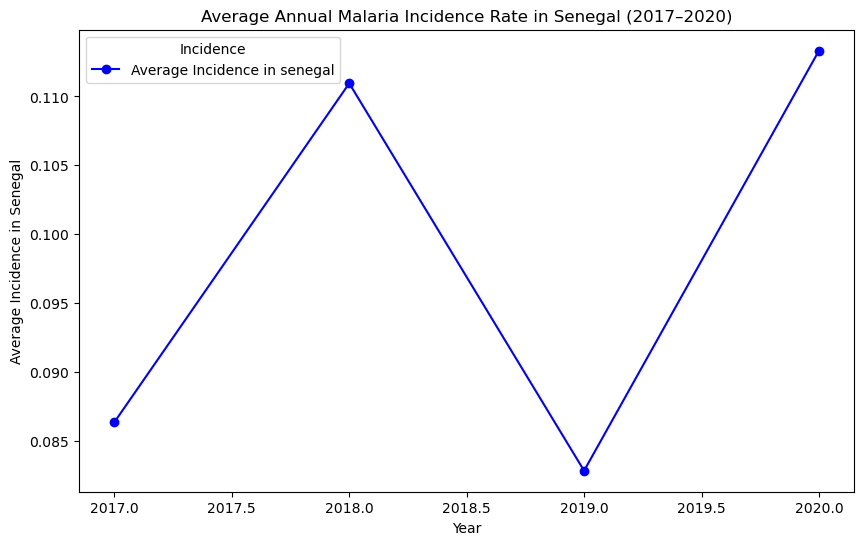

In [38]:
average_incidence_per_year = df_tidy_Sen.groupby('year')['incidence'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_incidence_per_year.index, average_incidence_per_year.values, marker='o', color='b', label='Average Incidence in senegal')
 
plt.xlabel('Year')
plt.ylabel('Average Incidence in Senegal')
plt.title('Average Annual Malaria Incidence Rate in Senegal (2017–2020)')
plt.legend(title="Incidence")
plt.savefig('Average Annual Malaria Incidence Rate in Senegal (2017–2020)')

plt.show()

This lineplot shows us the variation malaria incidence in Senegal.
From this plot one can see that in 2017 the  incidence of malaria increases,and  it decreases in 2019 while it increase in 2020. So this draw attention to the fact that the actions put into place the malaria from 2017 to 2019 is not consistent efficient. 

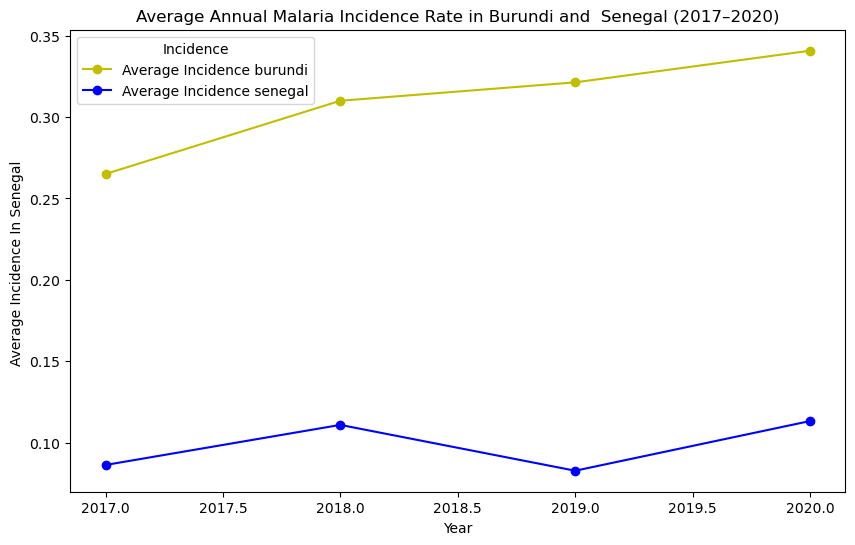

In [39]:
plt.figure(figsize=(10, 6))
average_incidence_per_year1 = df_tidy_Sen.groupby('year')['incidence'].mean()
average_incidence_per_year = df_tidy_Burundi.groupby('year')['incidence'].mean()
plt.plot(average_incidence_per_year.index, average_incidence_per_year.values, marker='o', color='y', label='Average Incidence burundi')
plt.plot(average_incidence_per_year1.index, average_incidence_per_year1.values, marker='o', color='b', label='Average Incidence senegal')
plt.xlabel('Year')
plt.ylabel('Average Incidence In Senegal ')
plt.title('Average Annual Malaria Incidence Rate in Burundi and  Senegal (2017–2020)')
plt.legend(title="Incidence")
plt.savefig('Average Annual Malaria Incidence Rate in Burundi and  Senegal (2017–2020)')
plt.show()




This graphic shows the variation of Malaria incidence from 2017 to 2020 in Burundi and Senegal.
 From this graphic one can notice that the  malaria incidence  increase from 2017 to 2020  in Burundi while In senegal  the malaria  increase mostly in 2017 and 2020.
 One can notice that for both countries the malaria incidence rate increases in 2017 and 2020. This confirm that malaria is a public health and it urge that the decisions to mitigate this disease.

**Recommandation**

From our analysis we recommand for both countries to consider the factor precipitation in the regions that it is high as key points to mitigate malaria incidence.
To sensitize the populations on this desease and call them to always sleep under the mosquito net. 
keep their houses clean especially during the period where the precipitations is high.Prioritize mostly the regions with high precipitations when sharing the mosquito net.